# 6. Gyakorlat - 1 DoF gerjesztett, csillapított lengőkar
2021.03.15

## Feladat:

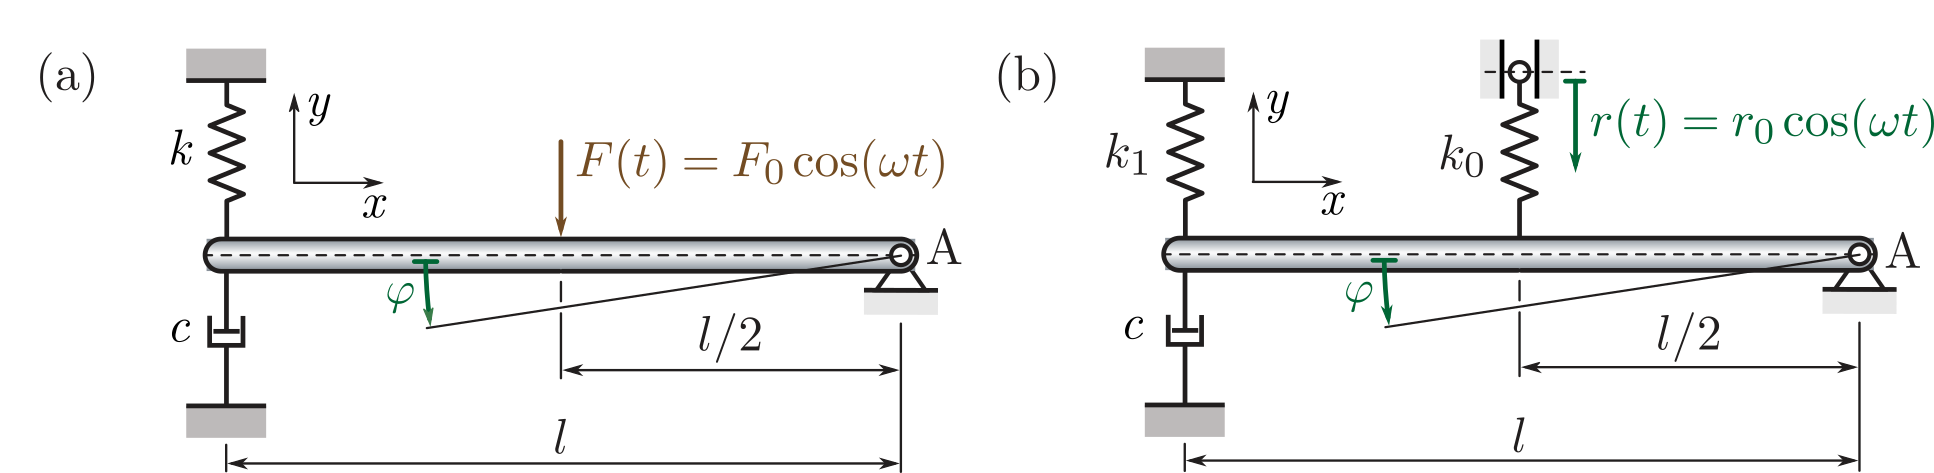

In [1]:
from IPython.display import Image
Image(filename='gyak6_1.png',width=900)

A mellékelt ábrán egy lengőkar látható, mely egy $l$ hosszúságú és $m$ tömegű rúddal van modellezve. Ez csak az A csukló körüli elfordulásra képes. Két eset van megkülöböztetve: az (a) ábra egy harmonikus erőgerjesztést mutat, míg a (b) ábrán egy harmoikus útgerjesztés történik a $k_0$ rugómerevségű rugón keresztül. A rúd mindkét esetben egy rugón ($k$, valamint a (b) ábrán $k_1$) és egy csillapításon ($c$) keresztül van a környezethez rözgzítve. Ezen 1 szabadságfokú lengőkar mozgását a $\varphi$ általánosított koordináta segítségével írjuk le, mely a vízszintes síktól van mérve. A szerkezetet a vízszintes síkban vizsgáljuk, valamint az egyensúlyi helyzete a $\varphi = 0$ szögelforduláshoz tartozik. Ekkor az (a) összeállítás $k$ rugóállandójú rugója, valamint a (b) $k_1$ rugóállandójú rugója erőmentes (nyújtatlan).

### Adatok:

|                       |                       |                    |
|:-----------------------|:-----------------------|:-----------------------|
| $m$ = 3 kg | $l$ = 1 m         | $\omega$ = 30 rad/s         |
| $k$ = 400 N/m | $F_0$ = 10 N| $c$ = 28 Ns/m         |
| $k_0$ = 1000 N/m | $r_0$ = 0.01 m| $k_1$ = 150 N/m         |


### Részfeladatok:
1. Vezesse le a mozgásegyenletet mindkét modell esetén, és számítsa ki a csillapított, illetve a csillapítatlan rendszer sajátkörfrekvencáját, csillapítási tényezőjét és statikus deformációját!
2. Ábrázolja a rezonanciagörbét és a fáziskésés diagrammot mindkét esetben!
3. Határozza meg a $\varphi(t)$ mozgástörvényt, amennyiben a kezdeti értékek $\varphi(t = 0) = \varphi_0 = 0{,}015$ rad és $\dot\varphi(t = 0) = 0$ rad/s!

## Megoldás:

### 1. Feladat

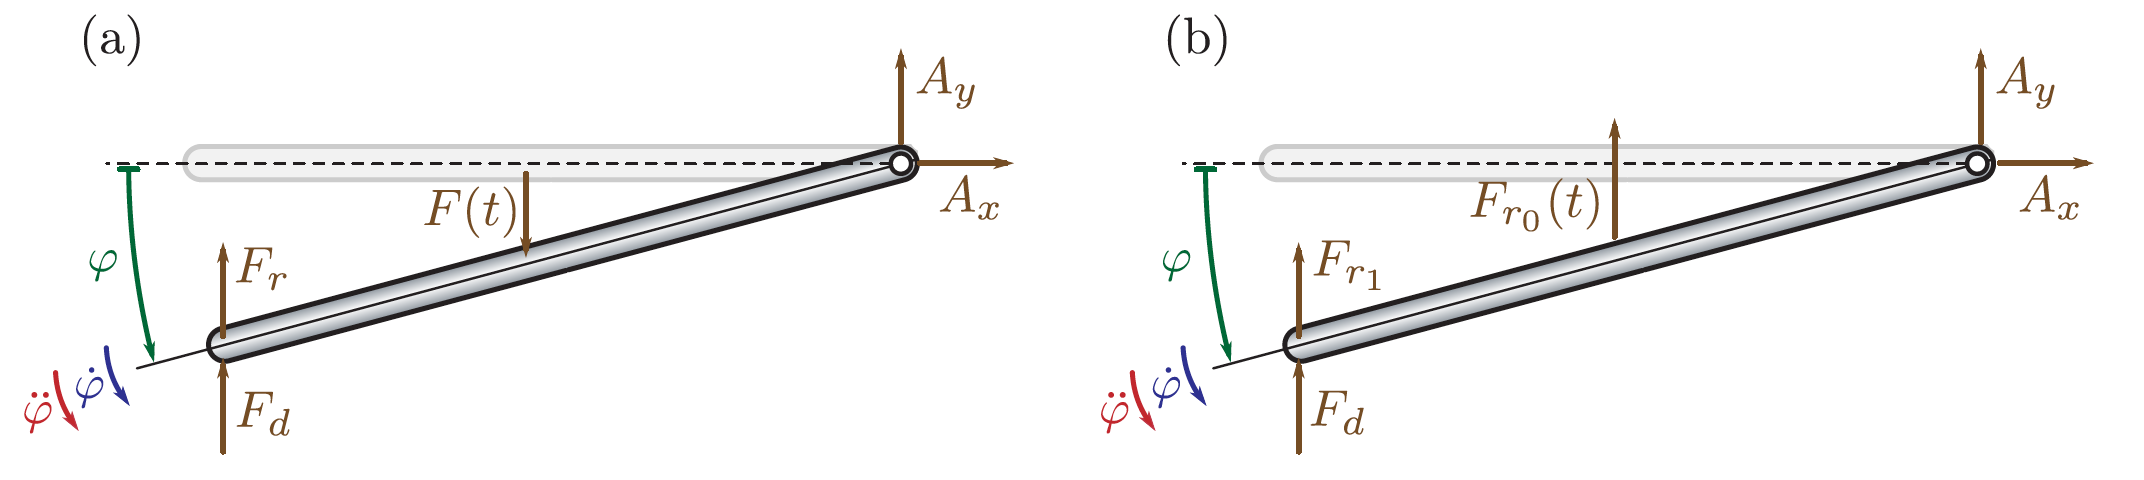

In [2]:
from IPython.display import Image
Image(filename='gyak6_2.png',width=900)

(Mivel a szabadtest ábra felrajzolása és a dinamika alaptételének alkalmazása nem programozási feladat, így ez itt nincs részletezve.) 

A következő mozgásegyenletek írhatóak fel (a szabadtest ábrák jelöléseit használva):

In [3]:
import sympy as sp
from IPython.display import Math # hogy tudjunk LaTeX szöveget kiírni
sp.init_printing()

t, m, θ_A, l, Fr, Fr1, Fd = sp.symbols('t, m, θ_A, l, F_r, F_r1, F_d')
F0, k, c, k0, k1, ω, r0, ζ, f0 = sp.symbols('F_0, k, c, k0, k1, ω, r0, ζ, f0')

φ = sp.Function('φ')(t)
F = sp.Function('F')(t)
Fr0 = sp.Function('F_r0')(t)

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben:
adatok = [(m, 3), (l, 1), (ω, 30), (k, 400), (F0, 10), 
          (c, 28), (k0, 1000), (r0, 0.01), (k1, 150)]


mozgegy_a_eq = sp.Eq(θ_A*sp.diff(φ,t,2), F * l/2 - Fr*l - Fd*l)  # az (a) ábra alapján
mozgegy_b_eq = sp.Eq(θ_A*sp.diff(φ,t,2), -Fr0 * l/2 - Fr1*l - Fd*l)  # a (b) ábra alapján

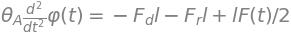

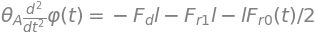

In [4]:
display(mozgegy_a_eq, mozgegy_b_eq)

In [5]:
# Linearizáljuk a rugókban/csillapításokban ébredő erők kifejezését

Fr_kif = k*l*φ  # közelítés; kis kitérések esetén
Fd_kif = c*l*sp.diff(φ,t)  # közelítés; kis kitérések esetén
Fr1_kif = k1*l*φ  # közelítés; kis kitérések esetén

In [6]:
# Vizsgáljuk a gerjesztés alakját.

# harmonikus erőgerjesztés esetében:
F_kif = F0*sp.cos(ω*t) 

# harmonikus útgerjesztés esetében:
Fr0_kif = k0 * (l/2*φ - r0*sp.cos(ω*t)) # linearizált alak -> kis kitérésekre érvényes

In [7]:
# Steiner-tétel használatával határozzuk meg a rúd tehetetlenségi nyomatékát
# `z` tengely körüli elfordulás esetén az `A` pontra.

θ_A_kif = sp.Rational(1,12) * m * l**2 + m * (l/2)**2 # sp.Rational(számláló,nevező) -> szimbolikus tört

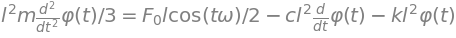

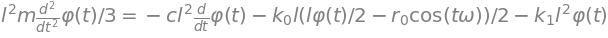

In [8]:
# Készítsünk behelyettesítési listát a fenti kifejezésekre:
kif_lista = [(θ_A,θ_A_kif), (Fr0,Fr0_kif), (F,F_kif), 
             (Fr1,Fr1_kif), (Fd,Fd_kif), (Fr,Fr_kif)]

mozgegy_a_eq = mozgegy_a_eq.subs(kif_lista)
mozgegy_b_eq = mozgegy_b_eq.subs(kif_lista)
display(mozgegy_a_eq,mozgegy_b_eq)

In [9]:
# A mozgásegyenletek most ún. sympy Equality objektumok,
display(type(mozgegy_a_eq))
display(mozgegy_a_eq.is_Equality)

# azaz relációk két kifejezés között (az egyenlet bal és jobb oldala).
# Ennek a használata eddig kényelmes volt, de az egyenletrendezés itt nem támogatott:
# nem lehet pl. a bal és a jobb oldalt is megszorozni egy számmal/kifejezéssel egyszerűen.
# Térjünk át a másik reprezentációra, ahol csak a bal oldallal foglalkozunk, míg a jobb 
# oldalt 0-vá tesszük.

sympy.core.relational.Equality

True

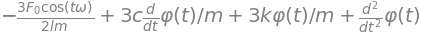

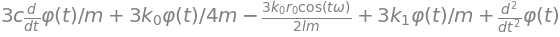

In [10]:
mozgegy_a = mozgegy_a_eq.rhs - mozgegy_a_eq.lhs
mozgegy_b = mozgegy_b_eq.rhs - mozgegy_b_eq.lhs

# osszunk le a főegyütthatóval
mozgegy_a = mozgegy_a / mozgegy_a.coeff(sp.diff(φ,t,2))
mozgegy_b = mozgegy_b / mozgegy_b.coeff(sp.diff(φ,t,2))

mozgegy_a = mozgegy_a.expand()
mozgegy_b = mozgegy_b.expand()

display(mozgegy_a,mozgegy_b) # egy oldalra rendezve!

In [11]:
ω_nat_a = sp.sqrt(mozgegy_a.coeff(φ))
ω_nat_b = sp.sqrt(mozgegy_b.coeff(φ))

# φ első deriváltjának együtthatójából fejezhetjük ki a rel. csillapítási tényezőt.
φd_coeff_a = sp.Eq(mozgegy_a.coeff(sp.diff(φ)),2*ζ*ω_nat_a)
φd_coeff_b = sp.Eq(mozgegy_b.coeff(sp.diff(φ)),2*ζ*ω_nat_b)

ζ_a = sp.solve(φd_coeff_a,ζ)[0]
ζ_b = sp.solve(φd_coeff_b,ζ)[0]

ω_damp_a = ω_nat_a*sp.sqrt(1-ζ_a**2)
ω_damp_b = ω_nat_b*sp.sqrt(1-ζ_b**2)

In [12]:
# Továbbá tudjuk, hogy a koszinuszos tag együtthatójából 
# számolható a statikus deformáció. Ám az itt negatív együtthatóval
# szerpel, mert alapból az egyenlet jobb oldalán a helye, de most át lett hozva.

cos_coeff_a = sp.Eq(-mozgegy_a.coeff(sp.cos(ω*t)),f0*ω_nat_a**2)
f0_a = sp.solve(cos_coeff_a,f0)[0]

cos_coeff_b = sp.Eq(-mozgegy_b.coeff(sp.cos(ω*t)),f0*ω_nat_b**2)
f0_b = sp.solve(cos_coeff_b,f0)[0]

In [13]:
# Helyettesítsünk be:

symb_list = [ω_nat_a,ω_nat_b,ζ_a,ζ_b,ω_damp_a,ω_damp_b,f0_a,f0_b]

num_eredmenyek = [elem.subs(adatok) for elem in symb_list] # list comprehension
num_eredmenyek

# Látszik, hogy ugyanazok lettek az eredmények az (a) és (b) esetben.

In [14]:
display(Math('\omega_n = {}\ \\text{{rad/s}}'.format(num_eredmenyek[0])))
display(Math('\zeta = {}\ [1]'.format(num_eredmenyek[2].evalf(2))))
display(Math('\omega_d = {}\ \\text{{rad/s}}'.format(num_eredmenyek[4].evalf(4))))
display(Math('f_0 = {}\ \\text{{rad}}'.format(num_eredmenyek[7].evalf(3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 2. Feladat

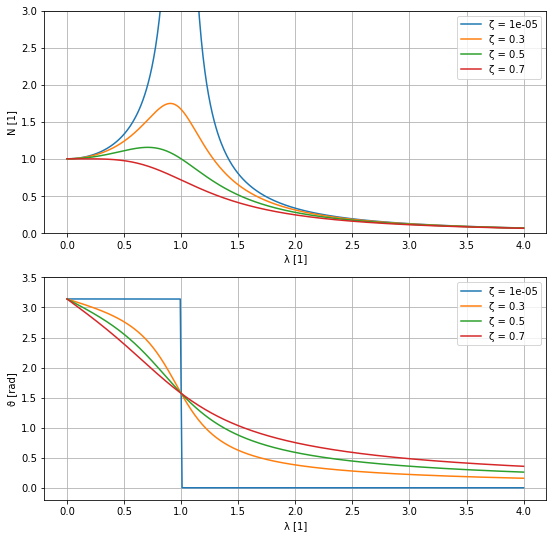

In [15]:
# A rezonanciagörbe és a fáziskésés diagram:

import matplotlib.pyplot as plt
from numpy import linspace

plt.subplots(figsize=(9, 9))  # beállítjuk a 'vászon' méretét

λ = sp.Symbol('λ')

# 2 koordináta rendszerre fogunk plottolni. Ezek elhelyezkedése egy rácson van. Ennek a 
# rácsnak 2 sora lesz, és 1 oszlopa. Azt, hogy éppen melyikre akarunk rajzolni,
# a 3. paraméter adja meg: `subplot(sorok_száma, oszlopok_száma, kivalaszott)`.
ax1 = plt.subplot(2,1,1) # Tehát ő lesz az egyik krsz,
ax2 = plt.subplot(2,1,2) # és ő a másik.

ζ_list = [1E-5, 0.3, 0.5, 0.7]  # ezen listaelemeken iterál végig a `for` ciklus 

for ζ in ζ_list: # végigiterálunk a rel. csill. tényezőkön
    
    N = 1 / sp.sqrt( (1 - λ**2)**2 + 4 * ζ**2 * λ**2 )
    ϑ = sp.atan2((1-λ**2),2*ζ*λ) + sp.pi/2
    
    λ_vals = linspace(0,4,501) # az x tengelyen felveszünk 101 osztási pontot 0 és 4 között
    # mindegyikre kiszámoljuk a megfelelő y értéket
    N_vals = [N.subs(λ,λ_item) for λ_item in λ_vals]  # ő lesz a felső krsz-en
    ϑ_vals = [ϑ.subs(λ,λ_item).evalf(4) for λ_item in λ_vals]  # ő az alsón
    
    ax1.plot(λ_vals,N_vals) # itt a felső krsz-re rajzolunk
    ax1.set_xlabel("λ [1]")
    ax1.set_ylabel("N [1]")
    ax1.set_ylim([0,3])
    ax2.plot(λ_vals,ϑ_vals) # itt az alsóra
    ax2.set_xlabel("λ [1]")
    ax2.set_ylabel("ϑ [rad]")
    ax2.set_ylim([-0.2,3.5])
# itt véget ért a `for`, mert már nics indentálva

ax1.grid() # rácsvonalak
ax2.grid()
ax1.legend(['ζ = {}'.format(elem) for elem in ζ_list])  # jelmagyarázat
ax2.legend(['ζ = {}'.format(elem) for elem in ζ_list])

plt.show()

### 3. Feladat

In [16]:
kezdeti_ert = {φ.subs(t,0): 0.015, φ.diff(t).subs(t,0): 0} 

φ_mozgtorv = sp.dsolve(mozgegy_a.subs(adatok),φ,ics=kezdeti_ert)
display(φ_mozgtorv.evalf(4))

# Egyszerű megoldást nem találtam, amivel a gerjesztő harmonikus tagokat 
# amplitúdó+fáziskésés alakra lehet hozni, csak a kézi módszert, ami a gyakorlaton is volt. 

Φ = sp.sqrt(φ_mozgtorv.rhs.coeff(sp.sin(30*t))**2 
        + φ_mozgtorv.rhs.coeff(sp.cos(30*t))**2).evalf(4)

ϑ = sp.atan2(φ_mozgtorv.rhs.coeff(sp.sin(30*t)),
             φ_mozgtorv.rhs.coeff(sp.cos(30*t)))

display(Math('\Phi = {}\ \\text{{rad}}'.format(Φ)))
display(Math('ϑ = {}\ \\text{{rad}}'.format(ϑ.evalf(4))))

# Mellesleg ϑ leolvasható a fáziskésés diagramról, valamint Φ kiszámítható
# a rezonanciagörbéről leolvasott `N` nagyítás, és a statikus deformáció szorzatából.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Készítette:

        Csuzdi Domonkos (Alkalmazott Mechanika Szakosztály) és 
        Juhos-Kiss Álmos (Alkalmazott Mechanika Szakosztály) 
        Takács Dénes (BME MM) ábrái és Béri Bence (BME MM) kidolgozása alapján.

        Hibák, javaslatok:
        amsz.bme@gmail.com
        csuzdi02@gmail.com
        almosjuhoskiss@gmail.com

        2021.03.15